# Diabetes Analysis 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') #for not showing warnings messages 

# Data Exploration

In [19]:
all_data = pd.read_csv("F:\ITI BI\MeriSkill\Projects\Project 2 - Diabetes Data/Exported Diabetes from SQL.csv")
all_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,AgeClassification,PregnancyClassification,Result
0,6,148,72,35,155,33.6,0.627,50,Elderly Age,High,diabetic
1,1,85,66,29,155,26.6,0.351,31,Middle Age,Normal,Non-diabetic
2,8,183,64,30,155,23.3,0.672,32,Middle Age,Very High,diabetic
3,1,89,66,23,94,28.1,0.167,21,Young,Normal,Non-diabetic
4,0,137,40,35,168,43.1,2.288,33,Middle Age,had not,diabetic


In [20]:
all_data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,AgeClassification,PregnancyClassification,Result
757,10,101,76,48,180,32.9,0.171,63,Old,High,Non-diabetic
758,2,122,72,27,155,36.8,0.340,27,Middle Age,Normal,Non-diabetic
759,5,121,72,23,112,26.2,0.245,30,Middle Age,Normal,Non-diabetic
760,1,126,60,30,155,30.1,0.349,47,Elderly Age,Normal,diabetic
761,1,93,72,31,155,30.4,0.315,23,Young,Normal,Non-diabetic


In [21]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               762 non-null    int64  
 1   Glucose                   762 non-null    int64  
 2   BloodPressure             762 non-null    int64  
 3   SkinThickness             762 non-null    int64  
 4   Insulin                   762 non-null    int64  
 5   BMI                       762 non-null    float64
 6   DiabetesPedigreeFunction  762 non-null    float64
 7   Age                       762 non-null    int64  
 8   AgeClassification         762 non-null    object 
 9   PregnancyClassification   762 non-null    object 
 10  Result                    762 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 65.6+ KB


In [22]:
all_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000
mean,3.834646,121.632546,72.568241,29.387139,155.510499,32.437008,0.472025,33.253281
std,3.343098,30.518927,12.088099,8.797980,85.207811,6.876634,0.331946,11.769362
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,25.000000,122.000000,27.500000,0.243250,24.000000
50%,3.000000,117.000000,72.000000,30.000000,155.000000,32.000000,0.372500,29.000000
75%,6.000000,140.750000,80.000000,32.000000,155.000000,36.500000,0.625500,41.000000
max,15.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [102]:
# Group the data by Result and count the number of times each value appears
value_counts = all_data['Result'].value_counts()

# Get the order of the Result values
order = value_counts.index.to_list()
value_counts

Non-diabetic    497
diabetic        265
Name: Result, dtype: int64

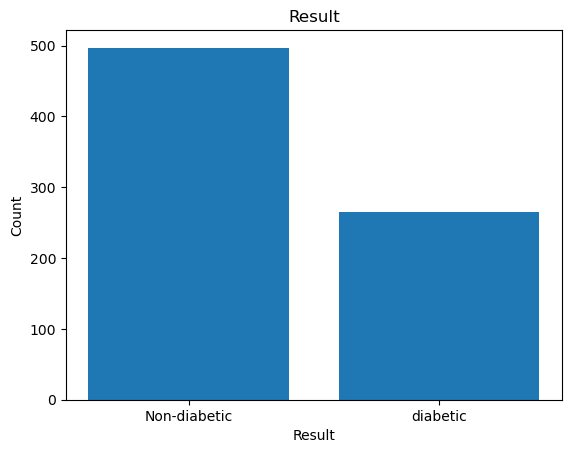

In [103]:
# Create a bar chart
plt.bar(order, value_counts)

# Set the title and labels
plt.title('Result')
plt.xlabel('Result')
plt.ylabel('Count')

# Show the plot
plt.show()

In [29]:
sorted_data = all_data.groupby(['AgeClassification']).mean().sort_values(by='Glucose', ascending=False)
sorted_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
AgeClassification,,,,,,,,
Old,4.851852,136.740741,77.851852,32.259259,153.703704,29.588889,0.446333,65.740741
Elderly Age,6.800000,133.666667,79.904762,30.076190,182.438095,32.492381,0.495124,51.066667
Middle Age,4.234300,122.413043,72.799517,30.487923,155.265700,33.396860,0.491222,32.323671
Young,1.500000,112.398148,67.898148,26.583333,143.115741,30.926389,0.427213,22.314815


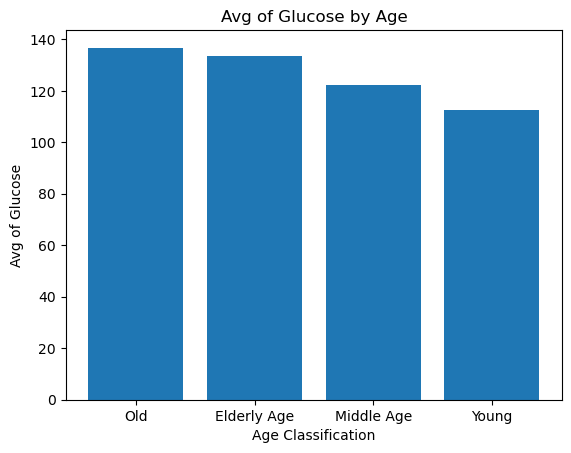

In [111]:
Glucose = sorted_data['Glucose']

plt.bar(sorted_data.index, Glucose)

plt.xticks(sorted_data.index)
plt.title('Avg of Glucose by Age')
plt.ylabel('Avg of Glucose')
plt.xlabel('Age Classification')
plt.show()

In [36]:
sorted_data2 = all_data.groupby(['PregnancyClassification']).mean().sort_values(by='Glucose', ascending=False)
sorted_data2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
PregnancyClassification,,,,,,,,
High,7.807407,133.281481,77.222222,30.918519,170.711111,32.629630,0.455126,46.503704
Extremely High,12.350000,125.600000,77.450000,32.550000,155.400000,36.580000,0.458000,41.150000
had not,0.000000,123.000000,73.747748,30.918919,157.081081,35.154955,0.520838,27.603604
Very High,8.161290,118.403226,73.580645,30.193548,156.483871,31.140323,0.496210,34.661290
Normal,2.569124,117.937788,70.449309,28.258065,150.246544,31.676267,0.461988,30.011521


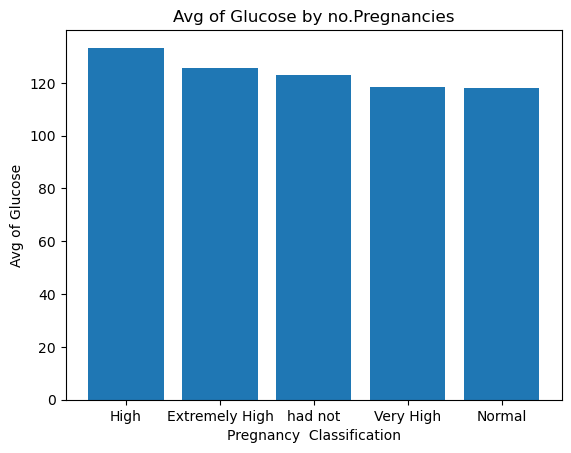

In [112]:
Glucose = sorted_data2['Glucose']

plt.bar(sorted_data2.index, Glucose)

plt.xticks(sorted_data2.index)
plt.title('Avg of Glucose by no.Pregnancies')
plt.ylabel('Avg of Glucose')
plt.xlabel('Pregnancy  Classification')
plt.show()

# Showing Density

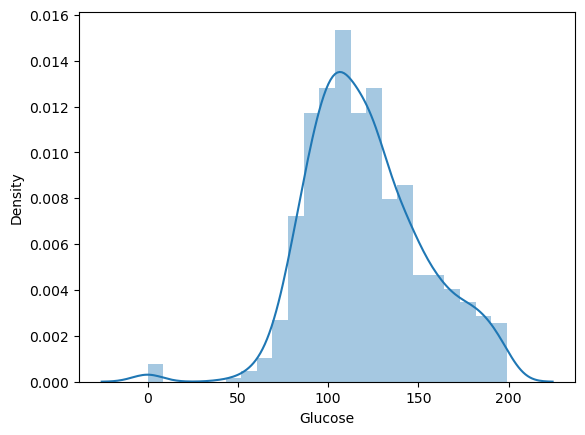

In [7]:
#showing density of Glucose
sns.distplot(all_data['Glucose'])

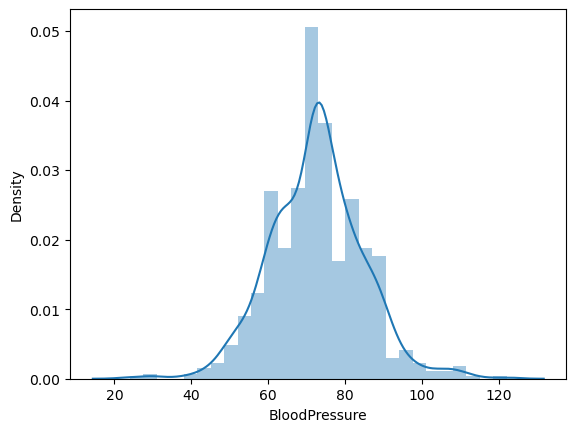

In [104]:
#showing density of BloodPressure
sns.distplot(all_data['BloodPressure']) 

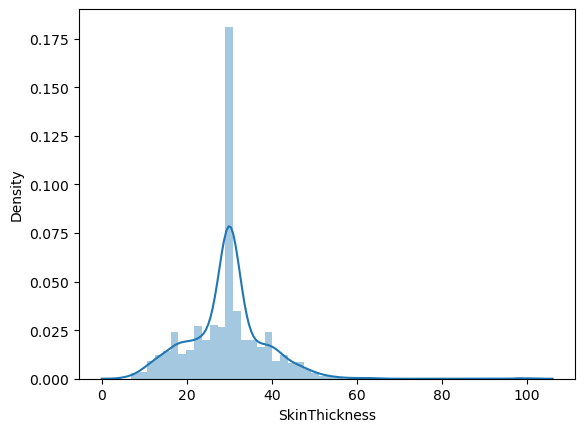

In [106]:
#showing density of SkinThickness
sns.distplot(all_data['SkinThicknes'])

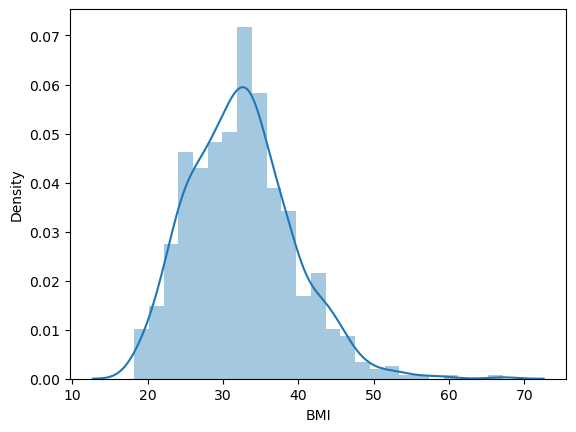

In [108]:
#showing density of BMI
sns.distplot(all_data['BMI']); 

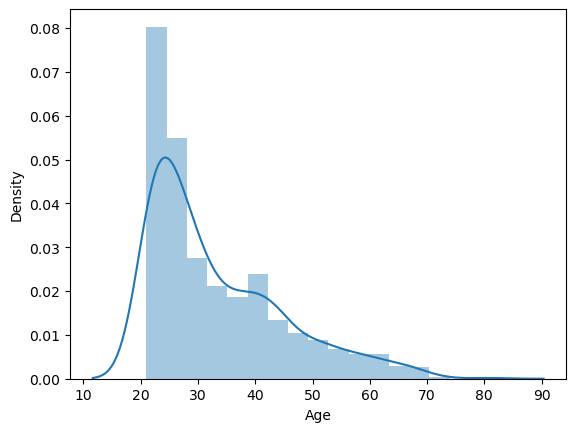

In [109]:
#showing density of Age
sns.distplot(all_data['Age'])

# Correlation

In [110]:
corr_matrix  = all_data.corr()
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.122583,0.210696,0.081302,0.057009,0.012047,-0.041824,0.542505
Glucose,0.122583,1.000000,0.222177,0.193138,0.422361,0.230439,0.135660,0.265619
BloodPressure,0.210696,0.222177,1.000000,0.199787,0.074214,0.279885,-0.005598,0.323408
SkinThickness,0.081302,0.193138,0.199787,1.000000,0.157466,0.535087,0.089786,0.133165
Insulin,0.057009,0.422361,0.074214,0.157466,1.000000,0.167246,0.099142,0.135332
BMI,0.012047,0.230439,0.279885,0.535087,0.167246,1.000000,0.150405,0.020249
DiabetesPedigreeFunction,-0.041824,0.135660,-0.005598,0.089786,0.099142,0.150405,1.000000,0.029353
Age,0.542505,0.265619,0.323408,0.133165,0.135332,0.020249,0.029353,1.000000


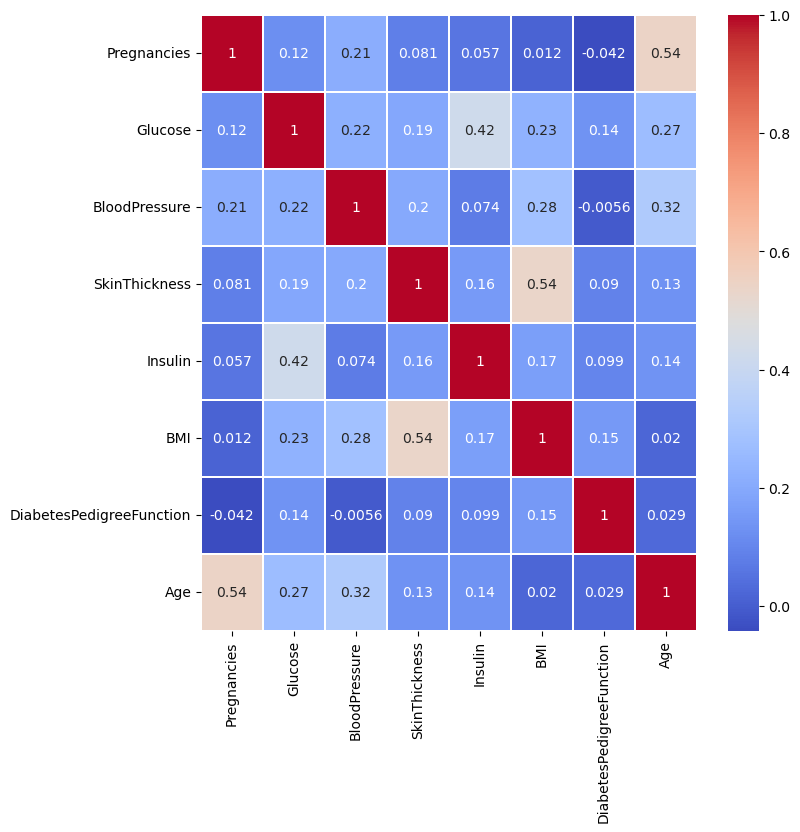

In [95]:
plt.figure(figsize = (8,8))
sns.heatmap(corr_matrix , annot = True ,cmap = 'coolwarm', linewidth = 0.35)
plt.show()